<a href="https://colab.research.google.com/github/omtriguero/Wed_Analytics_Sentimental_Analytics/blob/main/Final_Project_Wed_Analytics_Sentimental_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINAL PROJECT-COMP-604-001 Web Analytics and Business Intelligence Tools.**
  

*   Oscar Mauricio Trigueros




**Social Media Data Analytics**






We are using Praw API to download data and perform social media data analysis from the plataform Reddit. We craeted a app for devolper in reddit with the following information:


*   Email= mauricio_t2003@yahoo.com
*   App Name = My APP Wed Analytic
*   ID Client= b70jdVnmRpFmVc12GvVuAw
*   Client_secret='yD_McmeM_yocK0IZYaBeUg8RSBsuqQ'





In [ ]:
!pip install praw #Downdload the libriary  praw to make a scarping form the Reddits forums.


In [ ]:
 pip install vaderSentiment #Downdload the libriary  Vader  to make a comaparations with textBlod sentimental analisys libriary.

Part 1: Get the Data (5 points)

Create a python code which download the social media data for selected search word in csv file.


In [ ]:
import pandas as pd
import praw
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math



# create object for VADER sentiment function interaction
sia = SentimentIntensityAnalyzer()

reddit = praw.Reddit(client_id='b70jdVnmRpFmVc12GvVuAw',
                     client_secret='yD_McmeM_yocK0IZYaBeUg8RSBsuqQ',
                     user_agent='news on hooks',check_for_async=False)

# get 30 hot posts from the solotravel subreddit
top_posts = reddit.subreddit('solotravel').top('month', limit=15)



# Sentiment analysis function for TextBlob tools
def text_blob_sentiment(review, sub_entries_textblob):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity >= 0.0001:
        if analysis.sentiment.polarity > 0:
            sub_entries_textblob['positive'] = sub_entries_textblob['positive'] + 1
            return 'Positive'

    elif analysis.sentiment.polarity <= -0.0001:
        if analysis.sentiment.polarity <= 0:
            sub_entries_textblob['negative'] = sub_entries_textblob['negative'] + 1
            return 'Negative'
    else:
        sub_entries_textblob['neutral'] = sub_entries_textblob['neutral'] + 1
        return 'Neutral'


# sentiment analysis function for VADER tool
def nltk_sentiment(review, sub_entries_nltk):
    vs = sia.polarity_scores(review)
    if not vs['neg'] > 0.05:
        if vs['pos'] - vs['neg'] > 0:
            sub_entries_nltk['positive'] = sub_entries_nltk['positive'] + 1
            return 'Positive'
        else:
            sub_entries_nltk['neutral'] = sub_entries_nltk['neutral'] + 1
            return 'Neutral'

    elif not vs['pos'] > 0.05:
        if vs['pos'] - vs['neg'] <= 0:
            sub_entries_nltk['negative'] = sub_entries_nltk['negative'] + 1
            return 'Negative'
        else:
            sub_entries_nltk['neutral'] = sub_entries_nltk['neutral'] + 1
            return 'Neutral'
    else:
        sub_entries_nltk['neutral'] = sub_entries_nltk['neutral'] + 1
        return 'Neutral'


# replication of comment section of reddit post
def replies_of(top_level_comment, count_comment, sub_entries_textblob, sub_entries_nltk):
    if len(top_level_comment.replies) == 0:
        count_comment = 0
        return
    else:
        for num, comment in enumerate(top_level_comment.replies):
            try:
                count_comment += 1
                print('-' * count_comment, comment.body)
                text_blob_sentiment(comment.body, sub_entries_textblob)
                nltk_sentiment(comment.body, sub_entries_nltk)
            except:
                continue
            replies_of(comment, count_comment, sub_entries_textblob,sub_entries_nltk)


def main():

    for submission in top_posts:
        sub_entries_textblob = {'negative': 0, 'positive' : 0, 'neutral' : 0}
        sub_entries_nltk = {'negative': 0, 'positive' : 0, 'neutral' : 0}
        print('Title of the post :', submission.title)
        text_blob_sentiment(submission.title, sub_entries_textblob)
        nltk_sentiment(submission.title, sub_entries_nltk)
        print("\n")
        submission_comm = reddit.submission(id=submission.id)

        for count, top_level_comment in enumerate(submission_comm.comments):
            print(f"-------------{count} top level comment start--------------")
            count_comm = 0
            try :
                print(top_level_comment.body)
                text_blob_sentiment(top_level_comment.body, sub_entries_textblob)
                nltk_sentiment(top_level_comment.body, sub_entries_nltk)
                replies_of(top_level_comment,
                           count_comm,
                           sub_entries_textblob,
                           sub_entries_nltk)
            except:
                continue
        print('Over all Sentiment of Topic by TextBlob :', sub_entries_textblob)
        print('Over all Sentiment of Topic by VADER :', sub_entries_nltk)
        print("\n\n\n")

if __name__ == '__main__' :
    main()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-280-78ed4504605e>:24: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  top_posts = reddit.subreddit('solotravel').top('month', limit=15)


Se han truncado las últimas 5000 líneas del flujo de salida.
Sometimes it’s like every new guy I meet…to the point that I’ve learned to not smile as much or get as into a conversation. Very sad. 

And yes, some guys get mortally wounded when you say…hey, I was just being friendly…no thanks. It suddenly takes an enjoyable conversation into wtf just happened…?

Even worse, my female friends don’t understand and I think are jealous when I complain…sbut it really is awful when 90% of conversations end this way!!!!
- Thank you for your insight ! Im sorry that you feel you have to tone yourself down to avoid this issue. Maybe it is necessary, though. I do feel like it would be better if more guys understood that sometimes our bubbly or friendly personalities are not meant for them but just how we are with everyone and didn’t think about it as an invitation.
-- I think there are ways to convey that you’re not interested early on without lying. But you have to be nimble and prepared to exit th

In [ ]:

# Get posts from  keywords
hot_post_1 = reddit.subreddit ('city').hot(limit = 1000)
hot_post_2 = reddit.subreddit ('live').hot(limit = 1000)
hot_post_3 = reddit.subreddit ('best').hot(limit = 1000)





In [ ]:
hot_post_1
hot_post_2
hot_post_3

In [ ]:
posts =[] # created a emphyn list
for post in hot_post_1:
    posts.append ([post.id, post.title])



In [ ]:
for post in hot_post_2:
    posts.append ([post.id, post.title])

In [ ]:
for post in hot_post_3:
    posts.append ([post.id, post.title])


In [ ]:

posts = pd.DataFrame (posts, columns = ['User', 'Comment']) #We add the comments using keywords with two variables, one User and another Comments (like Tweet_Data in tweet anlysis  that we saw in class )

In [ ]:
df = pd.DataFrame (data = posts)
dataframe = df.to_csv (r'Best_Cities_Live.csv', index = False)
df = pd.read_csv ('Best_Cities_Live.csv')
print(df.head ())
print(df.shape)

      User                                            Comment
0  1ac95ga  Fantastic to see @DrSJaishankar engaging with ...
1  1ac798i  Thales' decision to set up avionics #MRO in #D...
2  19eel0a  President Droupadi Murmu for inaugurating Kaus...
3  19dqc5d  #RepublicDay2024 The #IndianNavy contingent ge...
4  19cw658  The Ambanis' donation of ₹2.51 crore to the Ay...
(451, 2)


Part 2: Analyse the Data (15 points)

In [ ]:
df_bcl = pd.read_csv('Best_Cities_Live.csv')

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity (text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity (text):
    return TextBlob(text). sentiment.polarity

In [ ]:
#Create two new columns
df_bcl ['Data_Subjectivity'] = df['Comment'].apply(getSubjectivity)
df_bcl['Data_Polarity'] = df['Comment'].apply(getPolarity)

#Show the new dataframe with the new columns
df_bcl

,User,Comment,Data_Subjectivity,Data_Polarity
0,1ac95ga,Fantastic to see @DrSJaishankar engaging with ...,0.380000,0.360000
1,1ac798i,Thales' decision to set up avionics #MRO in #D...,0.500000,0.000000
2,19eel0a,President Droupadi Murmu for inaugurating Kaus...,0.616667,0.466667
3,19dqc5d,#RepublicDay2024 The #IndianNavy contingent ge...,0.416667,-0.175000
4,19cw658,The Ambanis' donation of ₹2.51 crore to the Ay...,0.333333,0.026667
...,...,...,...,...
446,eajzer,Life in BestBuy,0.000000,0.000000
447,e5lxej,I need karma to create a subreddit,0.000000,0.000000
448,d3mxgw,How Reddit works,0.000000,0.000000
449,9w63vl,"""Parsec Gaming"" allows local multi games to be...",0.000000,0.000000


Generating sentimental analysis

In [ ]:
#Evaluating positive, negative and neutral sentimaental analysis and adding it into the dataframe
def getAnalysis (x):
    if x < 0:
        return 'Negative'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
# Create a new Column with all conditions which we defined based on that give the output like negative, neutral and positive.
df_bcl['Data_Analysis'] = df_bcl['Data_Polarity'].apply(getAnalysis)

#Print the Dataframe
df_bcl

,User,Comment,Data_Subjectivity,Data_Polarity,Data_Analysis
0,1ac95ga,Fantastic to see @DrSJaishankar engaging with ...,0.380000,0.360000,Positive
1,1ac798i,Thales' decision to set up avionics #MRO in #D...,0.500000,0.000000,Neutral
2,19eel0a,President Droupadi Murmu for inaugurating Kaus...,0.616667,0.466667,Positive
3,19dqc5d,#RepublicDay2024 The #IndianNavy contingent ge...,0.416667,-0.175000,Negative
4,19cw658,The Ambanis' donation of ₹2.51 crore to the Ay...,0.333333,0.026667,Positive
...,...,...,...,...,...
446,eajzer,Life in BestBuy,0.000000,0.000000,Neutral
447,e5lxej,I need karma to create a subreddit,0.000000,0.000000,Neutral
448,d3mxgw,How Reddit works,0.000000,0.000000,Neutral
449,9w63vl,"""Parsec Gaming"" allows local multi games to be...",0.000000,0.000000,Neutral


In [ ]:
df_bcl.head()

,User,Comment,Data_Subjectivity,Data_Polarity,Data_Analysis
0,1ac95ga,Fantastic to see @DrSJaishankar engaging with ...,0.380000,0.360000,Positive
1,1ac798i,Thales' decision to set up avionics #MRO in #D...,0.500000,0.000000,Neutral
2,19eel0a,President Droupadi Murmu for inaugurating Kaus...,0.616667,0.466667,Positive
3,19dqc5d,#RepublicDay2024 The #IndianNavy contingent ge...,0.416667,-0.175000,Negative
4,19cw658,The Ambanis' donation of ₹2.51 crore to the Ay...,0.333333,0.026667,Positive


In [ ]:
df_bcl.isnull().sum()

,0
User,0
Comment,0
Data_Subjectivity,0
Data_Polarity,0
Data_Analysis,0


In [ ]:
# Gathering all the comments and print it
j=1

Positive_sortedDF = df_bcl.sort_values (by=['Data_Polarity'])

for i in range(0, Positive_sortedDF.shape [0]):
    if(Positive_sortedDF [ 'Data_Analysis'][i] == 'Positive'):
        print (str(j) + ' ) ' + Positive_sortedDF ['Comment'][i])
        print()
        j = j+1

1 ) Fantastic to see @DrSJaishankar engaging with #French FM @steph_sejourne Their discussion on regional and global issues reflects the strength of our strategic partnership. Diplomacy at its best! #IndiaFranceRelations @DrSJaishankar

2 ) President Droupadi Murmu for inaugurating Kaushal Bhawan, a milestone for @MSDESkillIndia . Under the leadership of @dpradhanbjp , this state-of-the-art facility promises to contribute significantly to a strong, skilled, and prosperous India.

3 ) The Ambanis' donation of ₹2.51 crore to the Ayodhya Ram Mandir Trust exemplifies the spirit of corporate social responsibility. Such acts not only strengthen cultural ties but also showcase the role businesses can play in nation-building.

4 ) Dynamic discussions between EAM Jaishankar and Bangladesh's new Foreign Minister mark a significant step in building stronger bonds. Bilateral cooperation on various fronts will undoubtedly contribute to the socio-economic development of both nations.

5 ) Exciting n

In [ ]:
# Gathering all the comments and print it
j=1

Negative_sortedDF = df_bcl.sort_values (by=['Data_Polarity'])
for i in range(0, Negative_sortedDF.shape [0]):
    if(Negative_sortedDF [ 'Data_Analysis'][i] == 'Negative'):
        print (str(j) + ' ) ' + Negative_sortedDF ['Comment'][i])
        print()
        j = j+1

1 ) #RepublicDay2024 The #IndianNavy contingent geared up for the #RepublicDay 2024 Parade.

2 ) Kraków *Empty Streets* October 2020 | POLAND

3 ) This is what happens when half of your family are from the city and the other half is from the country

4 ) An Evening in Molenbeek | Brussels Dangerous Neighborhood

5 ) Sand City / Past Editions Music by Jaaz UPP - Another Planet

6 ) Solo in the Most Dangerous Hood of Gdańsk | Poland

7 ) [4K] RELAXING MIAMI NIGHT WALK TO BRICKELL CITY CENTER

8 ) Climb down Petřín Lookout Tower | Prague

9 ) Blocks-long BLM bike protest yesterday shutting down Amsterdam (In New York City)

10 ) One World Trade Center

11 ) Cruzing down the Christmas market with squaaad🤙🏿

12 ) I live in a city called Bad münstereifel in a small village on germany. This is my mother in law garden.

13 ) Random street shot of a building in Kolkata, India

14 ) Terrifying drug PSA search

15 ) Dangerous squad recently

16 ) Have no more toilet paper for y'all's bs



In [ ]:
# Gathering all the comments and print it
j=1

NeutralsortedDF = df_bcl.sort_values (by=['Data_Polarity'])
for i in range(0, NeutralsortedDF.shape [0]):
    if(NeutralsortedDF [ 'Data_Analysis'][i] == 'Neutral'):
        print (str(j) + ' ) ' + NeutralsortedDF ['Comment'][i])
        print()
        j = j+1

1 ) Thales' decision to set up avionics #MRO in #Delhi aligns with the global trend of expanding aerospace capabilities. It reflects confidence in India's potential as a hub for aviation excellence. This strategic move opens doors for #skilldevelopment

2 ) #IITDelhi 'Work4Food' is a game-changer, showcasing the power of technology to uplift gig workers and optimize delivery platforms. This homegrown #solution reflects India's commitment to fostering inclusive and sustainable #techsolutions

3 ) Traffic in the city.

4 ) Discover Paradise: Puerto Rico

5 ) FSM Bridge, Istanbul

6 ) Do you guys think Stockport should be a City?

7 ) One Night in Dublin | Ireland

8 ) AL MASA BASMA - #najran

9 ) A Night in Erbil | Iraqi Kurdistan

10 ) Hoods of Zadar | Bulevar (BRONX) | Croatia

11 ) London

12 ) Zadar Nights Livestream | Croatia

13 ) Longest City Road Tunnel in Europe - Blanka Tunnel / Tunel Blanka

14 ) Is This the Biggest Upcoming Minecraft Project?

15 ) Hoods of Zadar | Višnjik & 

 Visualizing the data

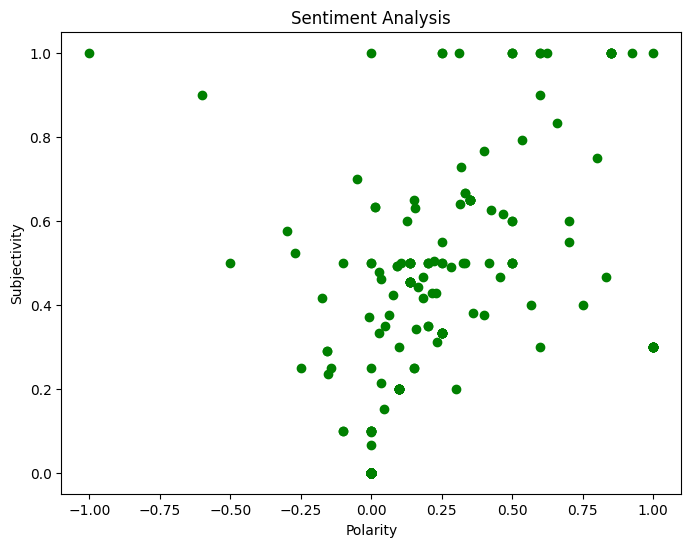

In [ ]:
# polarity and subjectivity plotting
# Size of the plot
plt.figure(figsize=(8,6))

for i in range(0, df_bcl.shape[0]):
    plt.scatter (df_bcl['Data_Polarity'][i],  df_bcl[ 'Data_Subjectivity'][i], color='Green' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

<Axes: xlabel='Data_Analysis'>

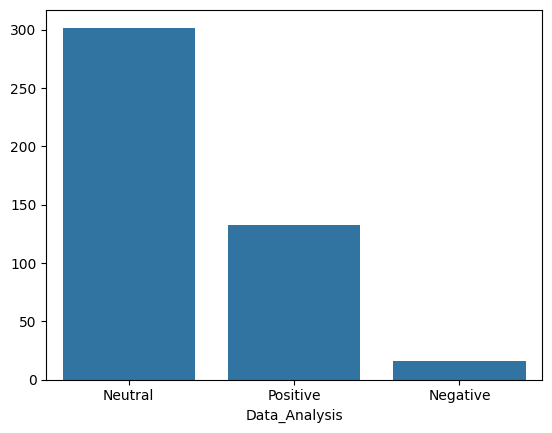

In [ ]:
category_counts = df_bcl["Data_Analysis"].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)

<ipython-input-300-fc02bf4e2ab0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Data_Polarity', y='Data_Subjectivity', data=df_bcl, palette='hls')


<Axes: xlabel='Data_Polarity', ylabel='Data_Subjectivity'>

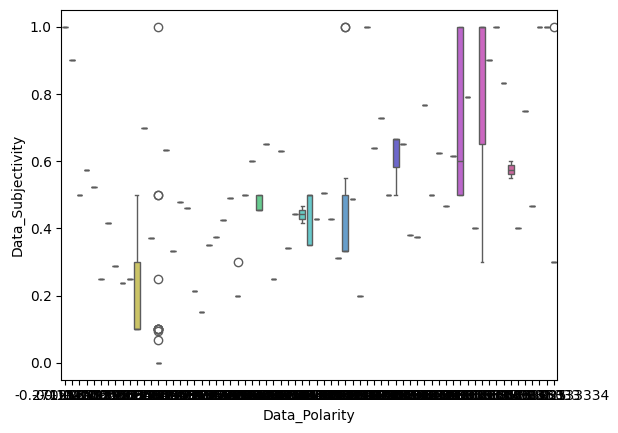

In [ ]:
sns.boxplot(x='Data_Polarity', y='Data_Subjectivity', data=df_bcl, palette='hls')

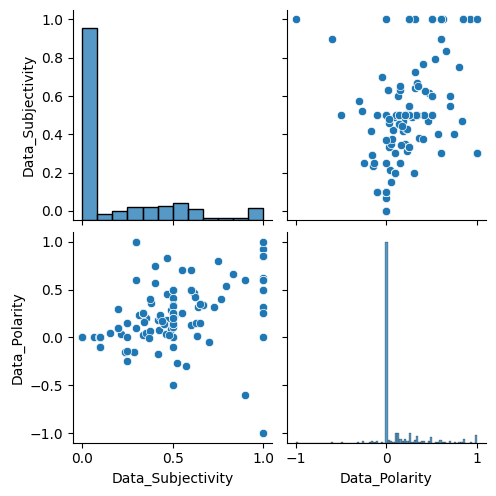

In [ ]:
sns.pairplot(df_bcl)

<Axes: xlabel='Data_Subjectivity', ylabel='Data_Polarity'>

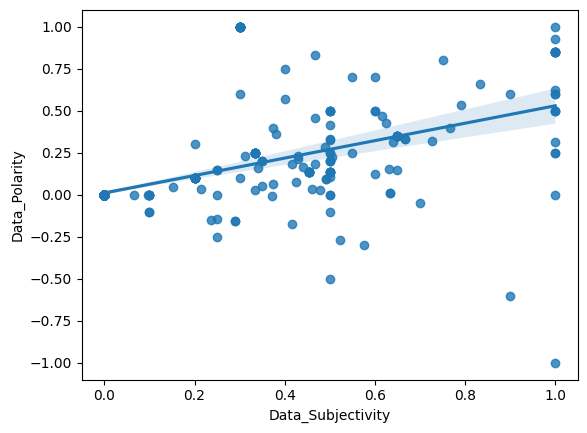

In [ ]:
sns.regplot(x='Data_Subjectivity', y='Data_Polarity', data=df_bcl, scatter=True)

In [ ]:
Data_Polarity = df_bcl.Data_Polarity
new_df = df_bcl.drop(columns=['User','Comment','Data_Polarity','Data_Analysis'])



In [ ]:
new_df.head()

,Data_Subjectivity
0,0.380000
1,0.500000
2,0.616667
3,0.416667
4,0.333333


In [ ]:
Data_Polarity.head()

,Data_Polarity
0,0.360000
1,0.000000
2,0.466667
3,-0.175000
4,0.026667


In [ ]:


# Linear regression Model Y = m * X + b (m is coefficient and b is intercept)
reg = linear_model.LinearRegression()
reg.fit(new_df,Data_Polarity)

LinearRegression()

In [ ]:
reg.coef_

array([0.51897578])

In [ ]:
reg.intercept_

0.010782202116933606

In [ ]:
reg.predict([[0.5]])



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.27027009])

In [ ]:
reg.predict([[0.55]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.29621888])

In [ ]:
reg.predict([[0.625]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.33514206])

In [ ]:
reg.predict([[0.65]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.34811646])

In [ ]:
y_true = [0.1364,0.7000,0.4250,0.3500]
y_pred = [0.2746, 0.3011, 0.3408, 0.3541]

y_true=np.array(y_true)
y_pred=np.array(y_pred)


In [ ]:
y_pred.ndim

1

In [ ]:
r2_score(y_true, y_pred)

-0.13992978239850817

In [ ]:
R= (( r2_score(y_true, y_pred)))**2


In [ ]:
print(R)

0.01958034400209385


CONCLUSIONS:


1.  To create a DataBase for make a Sentimental analisys, we chose the social network Reddit,they allow us to take  data from their forums.
2.   We  crearted a account like dovelopers making the App  with name **My APP Wed Analytic**,  a ID Client and client secret code.
3.   We take the data from the forum called 'solotravel' collecting the the 431 comments throught the last month, these comments are about the next keywords: 'city', 'live' and 'best'.
4.  Into the code before  we will be getting the Database, we make a setimental analisys comparing two libreries, the libriary Vader vs Libriary TextBlob with similars outputs, this is the sample:
    

*   Over all Sentiment of Topic by TextBlob : {'negative': 3, 'positive': 30, 'neutral': 6}.

*   Over all Sentiment of Topic by VADER : {'negative': 0, 'positive': 28, 'neutral': 11}.


5. We created a DataFrame called 'Best_Cities_Live.csv' with two variables (user and comment) and 431 rows, this data base we used it to make the sentimental analisys in the way that the Dr. Patel tought us in class.
   
5. Graphing a scatter plot   subjectivity vs polarity using library  Matplot, where  we fund that most of the comment tend to be neutral about the topic.
6.   Graphing a Histogram plot   Comment's number vs polarity using the library Seaborn, where  we fund that most of the comment tend to be neutral about the topic
7.  With  library Seaborn we created a histogram and scatterplot for subjectivity vs polarity and  histogram and scatterplot for polarity vs subjectivity, showing the most of the comentarias have neutral opinions with high subjetivity score.

8.   At ther end, we make a liner regression model using the library  sklearn for  polarity vs subjectivity, and we run several valuas and generarate the coffiecient of regression and correlation.












Sources:


*   (n.d.). Creating statistical data graphics. Colab. https://colab.research.google.com/drive/1uLrGctQnfOa6114Uy_f7WhjBstj8OsCH#scrollTo=FNOOvG6jsy4n
* praw.readthedocs.io (n.d.). Praw Documentation. https://praw.readthedocs.io/en/stable/getting_started/quick_start.html

*   medium (n.d.). What Are the Different Types of Sentiment Analysis ? Https://Medium.com/. https://medium.com/nerd-for-tech/what-are-the-different-types-of-sentiment-analysis-808f36ef89ee
* towardsdatascience (n.d.). Automate Sentiment Analysis Process for Reddit Post: TextBlob and VADER. Https://Towardsdatascience.com/. https://towardsdatascience.com/automate-sentiment-analysis-process-for-reddit-post-textblob-and-vader-8a79c269522f

*   towardsdatascience (n.d.). Sentiment Analysis using TextBlob. Https://Towardsdatascience.com/. https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524






